<a href="https://colab.research.google.com/github/SurabhiA07/Decision-Tree-Algorithm/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Name: Surabhi Awate
Domain: Data science
Task6: Decision Tree Classifier
Batch: May2024
Company: The Sparks Foundation

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

data = {
    'Id': range(1, 151),
    'SepalLengthCm':  [ 5.1, 4.9, 4.7, 4.6, 5, 5.4, 4.6, 5, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6 ,
                       5.1, 4.8, 5, 5, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5, 5.5, 4.9, 4.4, 5.1, 5, 4.5, 4.4, 5, 5.1, 4.8, 5.1,
                       4.6, 5.3, 5, 7, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5, 5.9, 6, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9,
                       6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6, 5.7, 5.5, 5.5, 5.8, 6, 5.4, 6, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5, 5.6,
                       5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7,
                       7.7, 6, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6, 6.9, 6.7, 6.9,
                       5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
    'SepalWidthCm': [3.5, 3, 3.2, 3.1, 3.6, 3.9, 3.4,3.4,2.9,3.1,3.7,3.4,3,3,4,4.4,3.9,3.5,3.8,3.8,3.4,3.7,3.6,3.3,3.4,3,3.4,3.5,3.4,
                     3.2,3.1,3.4,4.1,4.2,3.1,3.2,3.5,3.1,3,3.4,3.5,2.3,3.2,3.5,3.8,3,3.8,3.2,3.7,3.3,3.2,3.2,3.1,2.3,2.8,2.8,3.3,2.4,2.9,
                     2.7,2,3,2.2,2.9,2.9,3.1,3,2.7,2.2,2.5,3.2,2.8,2.5,2.8,2.9,3,2.8,3,2.9,2.6,2.4,2.4,2.7,2.7,3,3.4,3.1,2.3,3,2.5,2.6,3,
                     2.6,2.3,2.7,3,2.9,2.9,2.5,2.8,3.3,2.7,3,2.9,3,3,2.5,2.9,2.5,3.6,3.2,2.7,3,2.5,2.8,3.2,3,3.8,2.6,2.2,3.2,2.8,2.8,2.7,
                     3.3,3.2,2.8,3,2.8,3,2.8,3.8,2.8,2.8,2.6,3,3.4,3.1,3,3.1,3.1,3.1,2.7,3.2,3.3,3,2.5,3,3.4,3],  # Insert your data here
    'PetalLengthCm': [1.4, 1.4, 1.3, 1.5, 1.4, 1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,1.7,1.5,1.7,1.5,1,1.7,1.9,1.6,1.6,1.5,
                      1.4,1.6,1.6,1.5,1.5,1.4,1.5,1.2,1.3,1.5,1.3,1.5,1.3,1.3,1.3,1.6,1.9,1.4,1.6,1.4,1.5,1.4,4.7,4.5,4.9,4,4.6,4.5,4.7,
                      3.3,4.6,3.9,3.5,4.2,4,4.7,3.6,4.4,4.5,4.1,4.5,3.9,4.8,4,4.9,4.7,4.3,4.4,4.8,5,4.5,3.5,3.8,3.7,3.9,5.1,4.5,4.5,4.7,
                      4.4,4.1,4,4.4,4.6,4,3.3,4.2,4.2,4.2,4.3,3,4.1,6,5.1,5.9,5.6,5.8,6.6,4.5,6.3,5.8,6.1,5.1,5.3,5.5,5,5.1,5.3,5.5,6.7,
                      6.9,5,5.7,4.9,6.7,4.9,5.7,6,4.8,4.9,5.6,5.8,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,4.8,5.4,5.6,5.1,5.1,5.9,5.7,5.2,5,5.2,
                      5.4,5.1],  # Insert your data here
    'PetalWidthCm': [0.2, 0.2, 0.2, 0.2, 0.2, 0.4,0.3,0.,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,0.3,0.3,0.2,0.4,0.2,0.5,0.2,0.2,0.4,0.2,
                     0.2,0.2,0.2,0.4,0.1,0.2,0.1,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0.2,0.6,0.4,0.3,0.2,0.2,0.2,0.2,1.4,1.5,1.5,1.3,1.5,1.3,1.6,
                     1,1.3,1.4,1,1.5,1,1.4,1.3,1.4,1.5,1,1.5,1.1,1.8,1.3,1.5,1.2,1.3,1.4,1.4,1.7,1.5,1,1.1,1,1.2,1.6,1.5,1.6,1.5,1.3,1.3,
                     1.3,1.2,1.4,1.2,1,1.3,1.2,1.3,1.3,1.1,1.3,2.5,1.9,2.1,1.8,2.2,2.1,1.7,1.8,1.8,2.5,2,1.9,2.1,2,2.4,2.3,1.8,2.2,2.3,1.5,
                     2.3,2,2,1.8,2.1,1.8,1.8,1.8,2.1,1.6,1.9,2,2.2,1.5,1.4,2.3,2.4,1.8,1.8,2.1,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2,2.3,1.8 ] , # Insert your data here
    'Species': ['Iris-setosa'] * 50 + ['Iris-versicolor'] * 50 + ['Iris-virginica'] * 50
}
df = pd.DataFrame(data)

In [2]:
# Spliting data into features and target
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

In [3]:
# training and testing sets of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# decision tree classifier
clf = DecisionTreeClassifier()

In [5]:
# Train the classifier & predictions
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


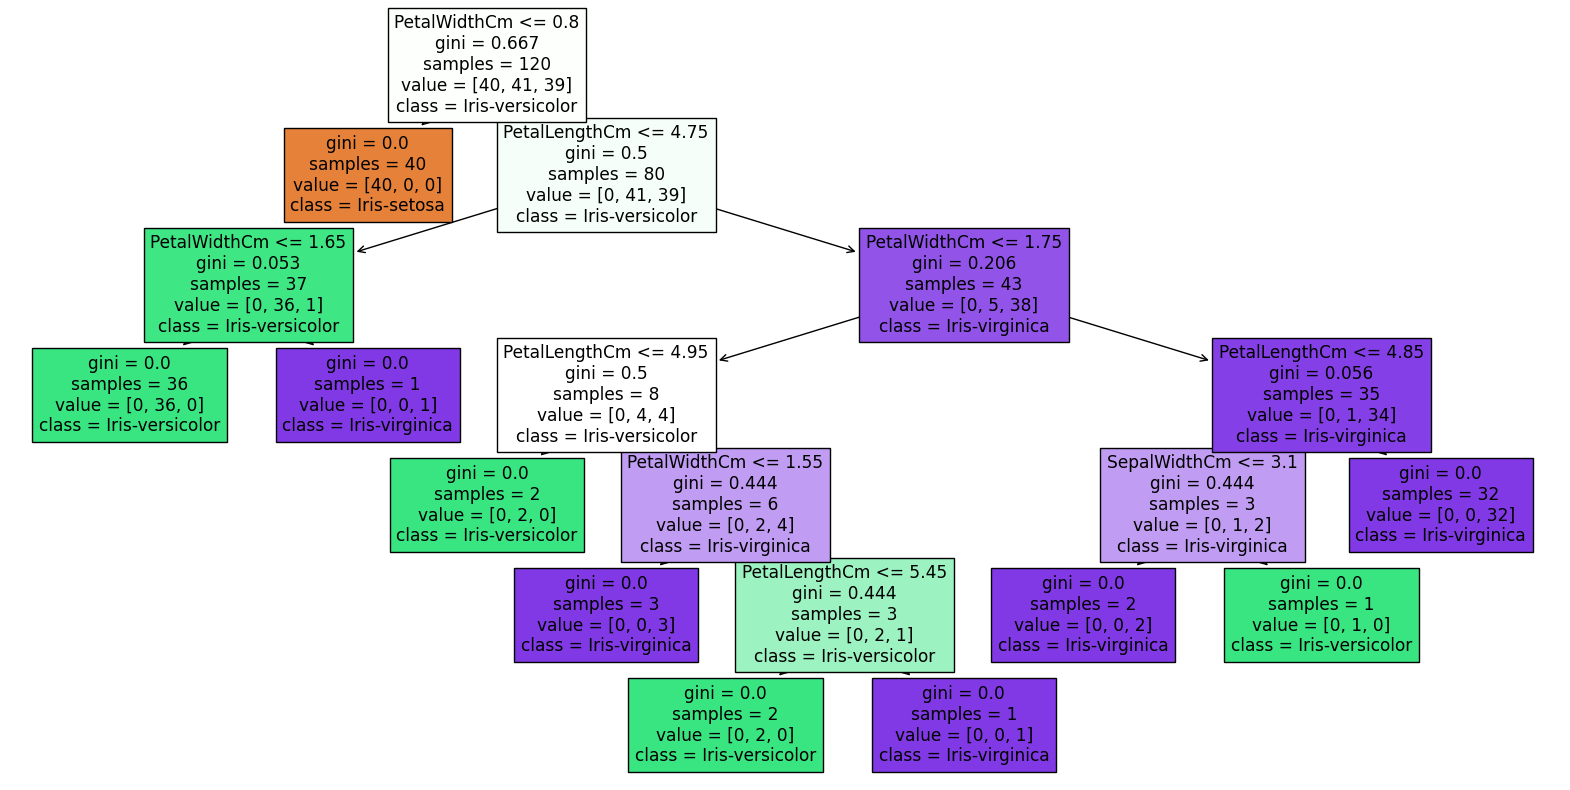

In [7]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=df['Species'].unique(), filled=True)
plt.show()